# Scrabble Game Statistics

This notebook visualizes statistics from your Scrabble games using the `game_stats.py` module.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Import our custom modules
from game_stats import StatsTracker, PlayerStats, GameStats

# Set up visualization style
plt.style.use('ggplot')
sns.set(style="whitegrid")

## Load Game Statistics

In [ ]:
# Initialize stats tracker
tracker = StatsTracker()

# Get list of all players
players = tracker.get_all_players()
print(f"Loaded statistics for {len(players)} players: {', '.join(players)}")
print(f"Total games recorded: {len(tracker.games)}")

Loaded 7 match examples


## Player Statistics Overview

,Name,Classification,Games Played,Avg Score,Highest Score,Highest Move,Highest Move Word,Bingo Count
7,JoueurF,Expert,6,789.3,830,95,REVERRAI,0
2,JoueurX,Advanced,6,781.0,802,116,QUARTEZ,1
3,JoueurY,Intermediate,6,781.0,810,82,JOCKEY,0
6,JoueurE,Advanced,6,779.7,800,88,TRAINERA,0
8,JoueurG,Novice,6,656.2,710,97,QUARTZ,0
0,JoueurA,Novice,6,568.3,887,82,xylène,0
1,JoueurB,Intermediate,6,564.2,897,82,xylène,0
12,JoueurK,Novice,6,556.3,963,72,JAR,0
9,JoueurH,Novice,6,554.0,600,78,SPHINX,0
13,JoueurL,Advanced,6,521.3,758,52,XI,0


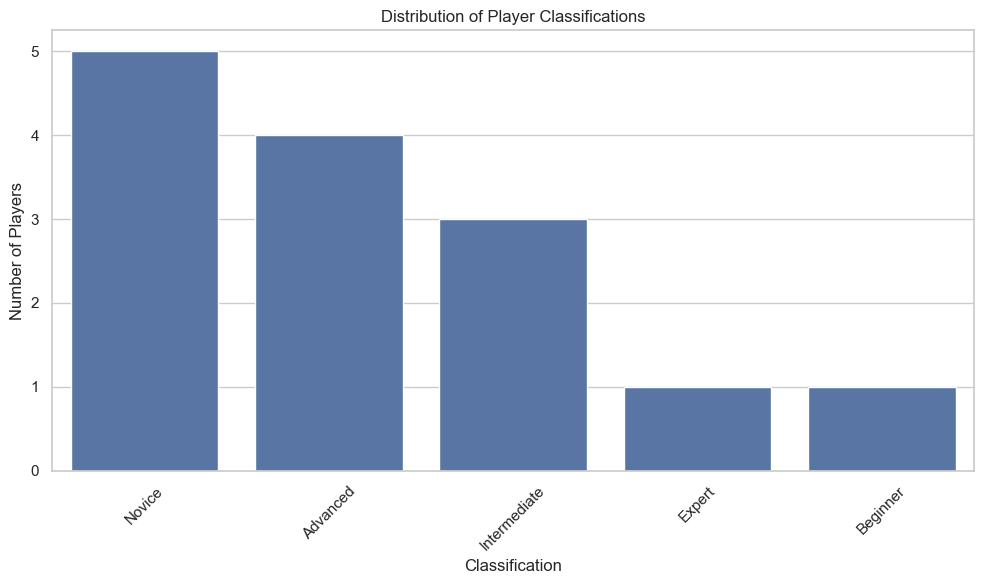

In [ ]:
def create_player_summary_table():
    """Create a DataFrame with player summary statistics."""
    player_data = []
    
    for name, player in league.players.items():
        summary = player.get_summary()
        
        player_data.append({
            'Name': name,
            'Classification': summary['classification'],
            'Games Played': summary['games_played'],
            'Avg Score': round(summary['avg_score'], 1),
            'Highest Score': summary['highest_score'],
            'Highest Move': summary['highest_scoring_move'][0],
            'Highest Move Word': summary['highest_scoring_move'][1],
            'Bingo Count': summary['bingo_count']
        })
    
    df = pd.DataFrame(player_data)
    return df

player_df = create_player_summary_table()
display(player_df.sort_values('Avg Score', ascending=False))

# Visualize player classifications
plt.figure(figsize=(10, 6))
class_counts = player_df['Classification'].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Distribution of Player Classifications')
plt.xlabel('Classification')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2.2 Score Distribution Analysis

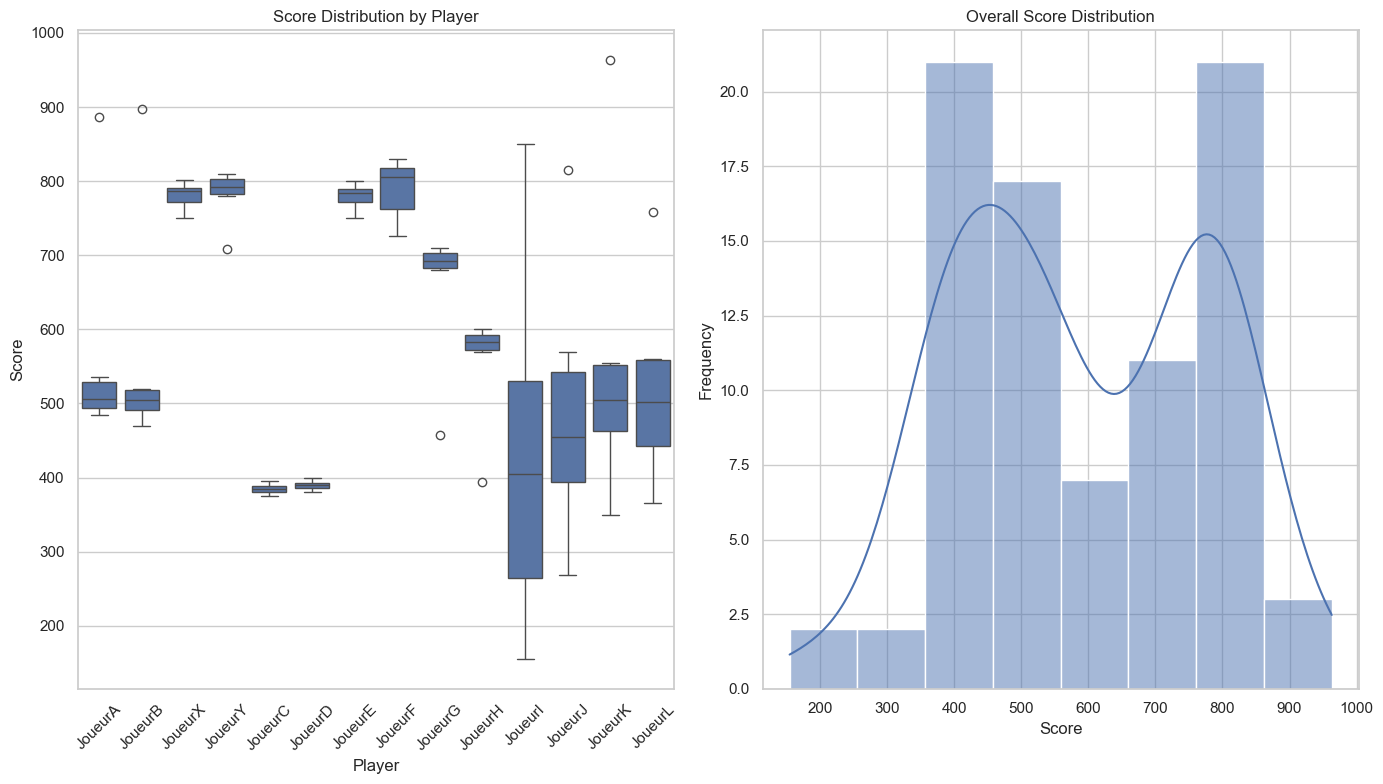

In [ ]:
# Collect all scores for visualization
all_scores = []
for name, player in league.players.items():
    for score in player.score_history:
        all_scores.append({'Player': name, 'Score': score})

score_df = pd.DataFrame(all_scores)

plt.figure(figsize=(14, 8))
# Box plot
plt.subplot(1, 2, 1)
sns.boxplot(x='Player', y='Score', data=score_df)
plt.title('Score Distribution by Player')
plt.xlabel('Player')
plt.ylabel('Score')
plt.xticks(rotation=45)

# Overall distribution
plt.subplot(1, 2, 2)
sns.histplot(score_df['Score'], kde=True)
plt.title('Overall Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### 2.3 Move Value Distribution

Move Value Modal Classes:
JoueurA: 28.0-38.8 (avg: 52.2)
JoueurB: 60.4-71.2 (avg: 52.8)
JoueurX: 28.0-50.0 (avg: 60.7)
JoueurY: 28.0-41.5 (avg: 54.5)
JoueurC: 18.0-24.0 (avg: 21.3)
JoueurD: 18.6-25.2 (avg: 21.8)
JoueurE: 69.5-88.0 (avg: 52.5)
JoueurF: 14.0-34.2 (avg: 48.4)
JoueurG: 18.0-37.8 (avg: 50.8)
JoueurH: 30.0-46.0 (avg: 43.8)
JoueurI: 38.6-53.2 (avg: 47.2)
JoueurJ: 26.0-46.4 (avg: 45.3)
JoueurK: 54.4-63.2 (avg: 53.5)
JoueurL: 40.8-46.4 (avg: 42.1)


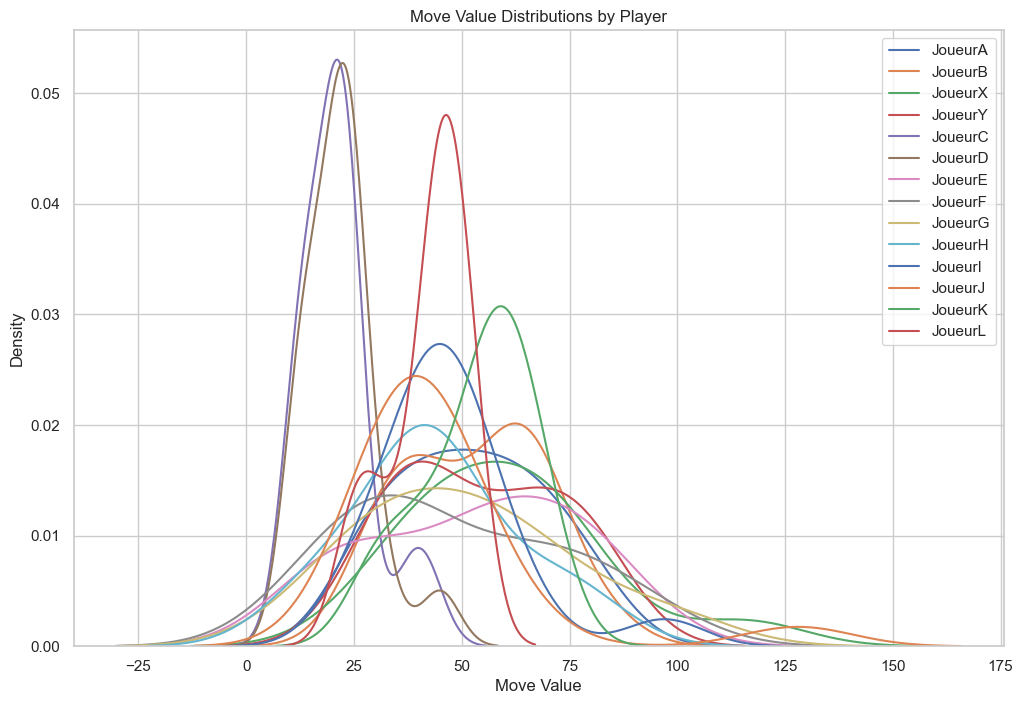

In [6]:
# Collect all move values
move_data = []
for name, player in league.players.items():
    for move_value in player.move_value_distribution:
        move_data.append({'Player': name, 'Move Value': move_value})

move_df = pd.DataFrame(move_data)

# Get the distribution stats for each player
distribution_stats = {}
for name, player in league.players.items():
    distribution_stats[name] = player.get_move_distribution_stats()

# Print the modal classes
print("Move Value Modal Classes:")
for name, stats in distribution_stats.items():
    print(f"{name}: {stats['modal_class']} (avg: {stats['avg_move_score']:.1f})")

# Plot move distributions
plt.figure(figsize=(12, 8))
for player in league.players.keys():
    player_moves = [m['Move Value'] for m in move_data if m['Player'] == player]
    sns.kdeplot(player_moves, label=player)
    
plt.title('Move Value Distributions by Player')
plt.xlabel('Move Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

## 3. Match-Level Analysis

### 3.1 Score Progression Visualization

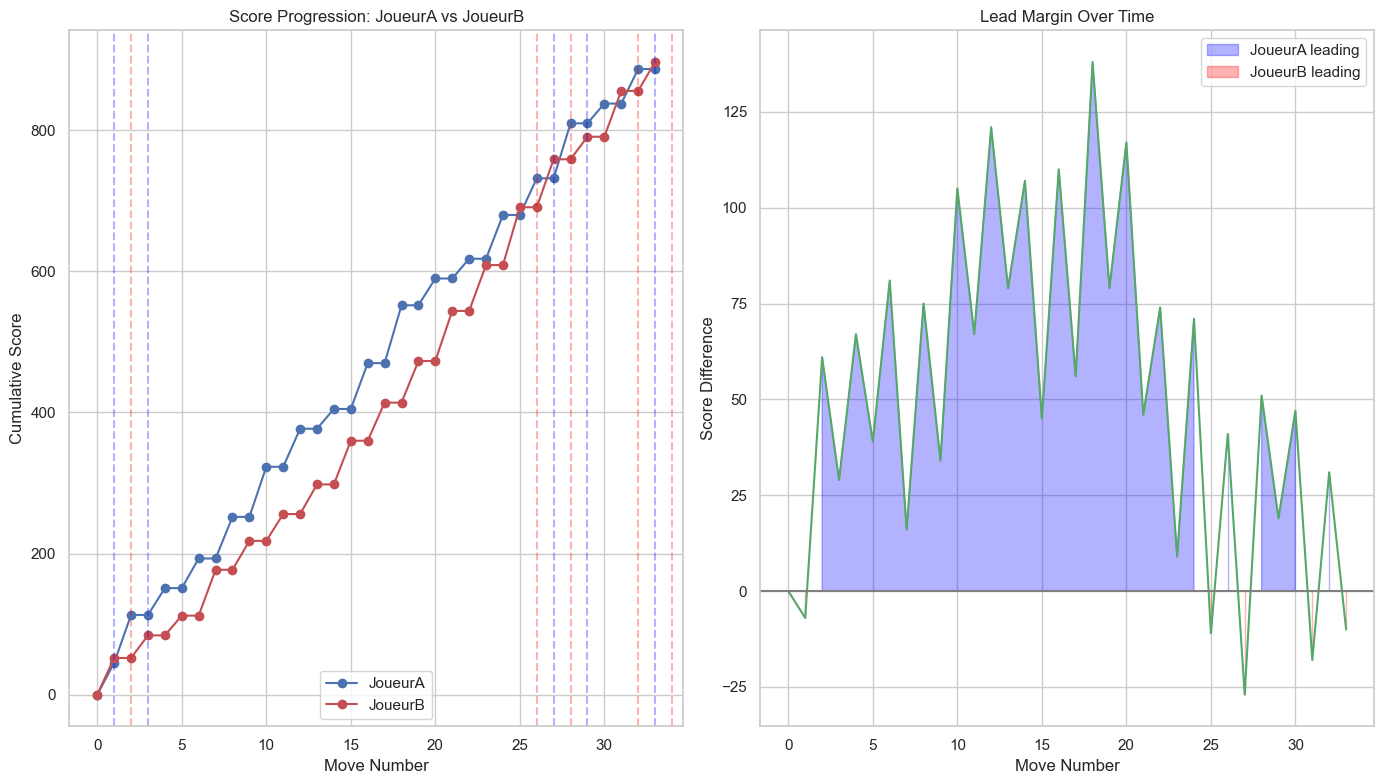

Match Summary: JoueurA vs JoueurB
Winner: JoueurB with a margin of 10 points
Total lead changes: 10
Lead changes by phase: {'early_game': 3, 'mid_game': 0, 'late_game': 7}
Match competitiveness index: 0.294
Average score difference: 55.5
Tension index: 0.062 (lower is more tense)

Pivotal moments:
  Move 1: JoueurA took lead with 45 point margin
  Move 3: JoueurA took lead with 61 point margin
  Move 27: JoueurA took lead with 41 point margin
  Move 29: JoueurA took lead with 51 point margin
  Move 33: JoueurA took lead with 31 point margin


In [7]:
def plot_match_score_progression(match_idx):
    """Visualize score progression for a specific match."""
    if match_idx >= len(league.matches):
        print(f"Match index {match_idx} out of range. Total matches: {len(league.matches)}")
        return
        
    match = league.matches[match_idx]
    player1 = match.player1.name
    player2 = match.player2.name
    
    plt.figure(figsize=(14, 8))
    plt.subplot(1, 2, 1)
    # Plot the score progression
    moves = range(len(match.score_progression[player1]))
    plt.plot(moves, match.score_progression[player1], 'b-o', label=player1)
    plt.plot(moves, match.score_progression[player2], 'r-o', label=player2)
    
    # Add lead change markers
    for move_num, leader, lead_size in match.lead_changes:
        color = 'blue' if leader == player1 else 'red'
        plt.axvline(x=move_num, color=color, linestyle='--', alpha=0.3)
    
    plt.title(f'Score Progression: {player1} vs {player2}')
    plt.xlabel('Move Number')
    plt.ylabel('Cumulative Score')
    plt.legend()
    plt.grid(True)
    
    # Plot score difference
    plt.subplot(1, 2, 2)
    score_diffs = []
    for i in range(len(match.score_progression[player1])):
        diff = match.score_progression[player1][i] - match.score_progression[player2][i]
        score_diffs.append(diff)
        
    plt.plot(moves, score_diffs, 'g-')
    plt.axhline(y=0, color='gray', linestyle='-')
    plt.fill_between(moves, score_diffs, 0, where=[d > 0 for d in score_diffs], color='blue', alpha=0.3, label=f'{player1} leading')
    plt.fill_between(moves, score_diffs, 0, where=[d < 0 for d in score_diffs], color='red', alpha=0.3, label=f'{player2} leading')
    
    plt.title('Lead Margin Over Time')
    plt.xlabel('Move Number')
    plt.ylabel('Score Difference')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Print match summary stats
    summary = match.get_match_summary()
    lead_stats = summary['lead_progression']
    
    print(f"Match Summary: {player1} vs {player2}")
    print(f"Winner: {summary['winner']} with a margin of {summary['margin']} points")
    print(f"Total lead changes: {lead_stats['total_lead_changes']}")
    print(f"Lead changes by phase: {lead_stats['lead_changes_by_phase']}")
    print(f"Match competitiveness index: {lead_stats['competitiveness_index']:.3f}")
    print(f"Average score difference: {lead_stats['average_score_difference']:.1f}")
    print(f"Tension index: {lead_stats['tension_index']:.3f} (lower is more tense)")
    
    if lead_stats['pivotal_moments']:
        print("\nPivotal moments:")
        for moment in lead_stats['pivotal_moments']:
            print(f"  Move {moment['move_number']}: {moment['new_leader']} took lead with {moment['lead_size']} point margin")

# Plot the first match as an example
plot_match_score_progression(0)

In [8]:
# Interactive control to select which match to analyze
from ipywidgets import interact, IntSlider

@interact(match_idx=IntSlider(min=0, max=len(league.matches)-1, step=1, value=0, description="Match:"))
def select_match(match_idx):
    plot_match_score_progression(match_idx)

interactive(children=(IntSlider(value=0, description='Match:', max=6), Output()), _dom_classes=('widget-intera…

### 3.2 Comparative Analysis of All Matches

,Match,Players,Winner,Margin,Lead Changes,Competitiveness,Tension,Total Moves
0,1,JoueurA vs JoueurB,JoueurB,10,10,0.294118,0.061906,34
1,2,JoueurX vs JoueurY,JoueurX,81,1,0.038462,0.117773,26
2,3,JoueurC vs JoueurD,JoueurD,10,28,0.777778,0.029757,36
3,4,JoueurE vs JoueurF,JoueurE,62,1,0.033333,0.118105,30
4,5,JoueurG vs JoueurH,JoueurG,63,1,0.055556,0.189278,18
5,6,JoueurI vs JoueurJ,JoueurI,35,15,0.416667,0.039085,36
6,7,JoueurK vs JoueurL,JoueurK,205,1,0.027778,0.121755,36


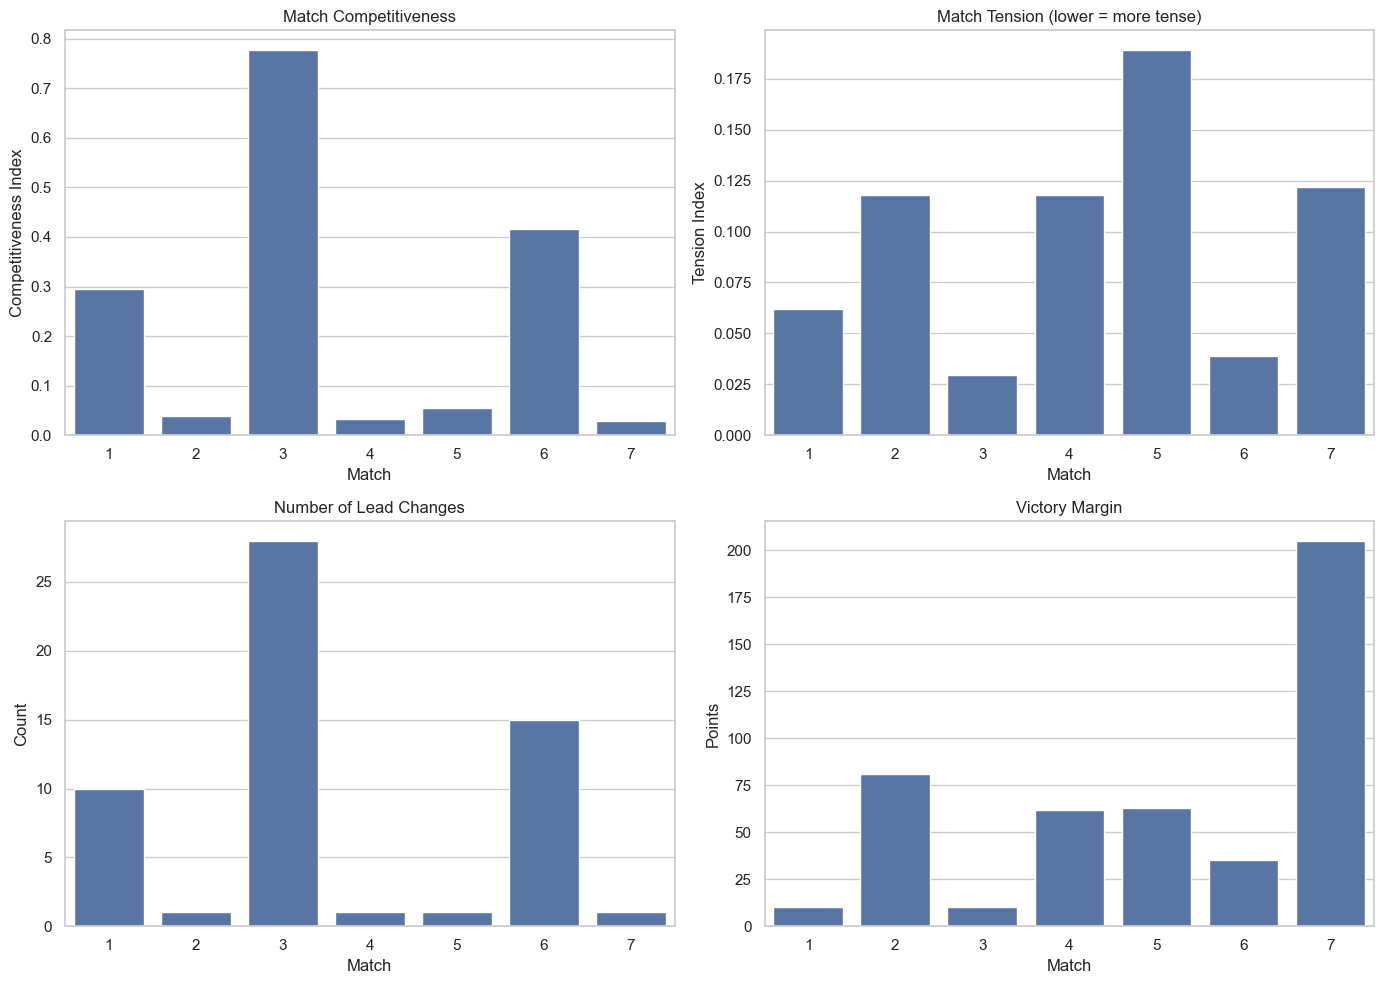

In [9]:
# Extract match-level metrics for all matches
match_metrics = []

for idx, match in enumerate(league.matches):
    if match.is_complete:
        summary = match.get_match_summary()
        lead_stats = summary['lead_progression']
        
        match_metrics.append({
            'Match': idx+1,
            'Players': f"{match.player1.name} vs {match.player2.name}",
            'Winner': summary['winner'],
            'Margin': summary['margin'],
            'Lead Changes': lead_stats['total_lead_changes'],
            'Competitiveness': lead_stats['competitiveness_index'],
            'Tension': lead_stats['tension_index'],
            'Total Moves': summary['total_moves']
        })

match_df = pd.DataFrame(match_metrics)
display(match_df)

# Create a comparative visualization
plt.figure(figsize=(14, 10))

# Subplot for competitiveness
plt.subplot(2, 2, 1)
sns.barplot(x='Match', y='Competitiveness', data=match_df)
plt.title('Match Competitiveness')
plt.xlabel('Match')
plt.ylabel('Competitiveness Index')

# Subplot for tension
plt.subplot(2, 2, 2)
sns.barplot(x='Match', y='Tension', data=match_df)
plt.title('Match Tension (lower = more tense)')
plt.xlabel('Match')
plt.ylabel('Tension Index')

# Subplot for lead changes
plt.subplot(2, 2, 3)
sns.barplot(x='Match', y='Lead Changes', data=match_df)
plt.title('Number of Lead Changes')
plt.xlabel('Match')
plt.ylabel('Count')

# Subplot for victory margin
plt.subplot(2, 2, 4)
sns.barplot(x='Match', y='Margin', data=match_df)
plt.title('Victory Margin')
plt.xlabel('Match')
plt.ylabel('Points')

plt.tight_layout()
plt.show()

## 4. League-Level Analysis

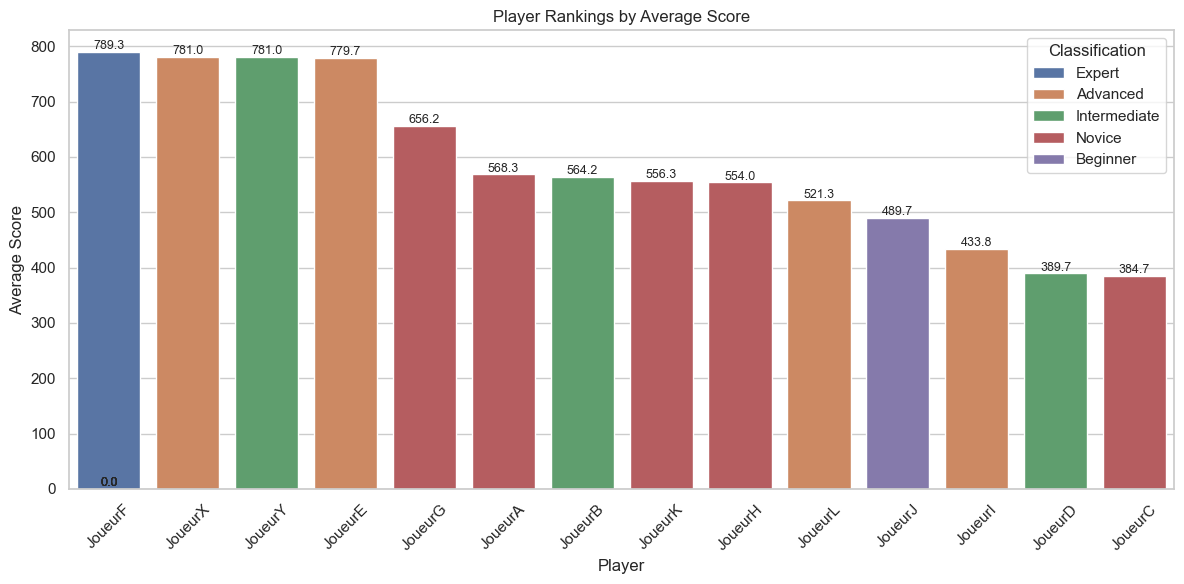

In [10]:
# Get league-wide statistics
league_stats = league.get_league_statistics()

# Display league overview
html = f"""<div style='background-color:#f0f0f0; padding:15px; border-radius:10px;'>
<h3>{league_stats['name']}</h3>
<p><b>Players:</b> {league_stats['player_count']}</p>
<p><b>Matches:</b> {league_stats['match_count']}</p>
<p><b>Rounds:</b> {league_stats['round_count']}</p>
<p><b>Average Score:</b> {league_stats['avg_league_score']:.1f}</p>
<p><b>Highest Individual Score:</b> {league_stats['highest_individual_score']}</p>
</div>"""

display(HTML(html))

# Create player ranking visualization
ranking_data = []
for name, stats in league_stats['player_stats'].items():
    ranking_data.append({
        'Player': name,
        'Average Score': stats['avg_score'],
        'Classification': stats['classification'],
        'Games': stats['games_played'],
        'Bingos': stats['bingo_count']
    })

ranking_df = pd.DataFrame(ranking_data).sort_values('Average Score', ascending=False)

plt.figure(figsize=(12, 6))
bars = sns.barplot(x='Player', y='Average Score', hue='Classification', data=ranking_df)
plt.title('Player Rankings by Average Score')
plt.xlabel('Player')
plt.ylabel('Average Score')
plt.xticks(rotation=45)

# Add the actual values on top of bars
for i, p in enumerate(bars.patches):
    height = p.get_height()
    bars.text(p.get_x() + p.get_width()/2., height + 5, f'{height:.1f}', 
            ha='center', fontsize=9)

plt.tight_layout()
plt.show()

### 4.1 Player Classification Distribution

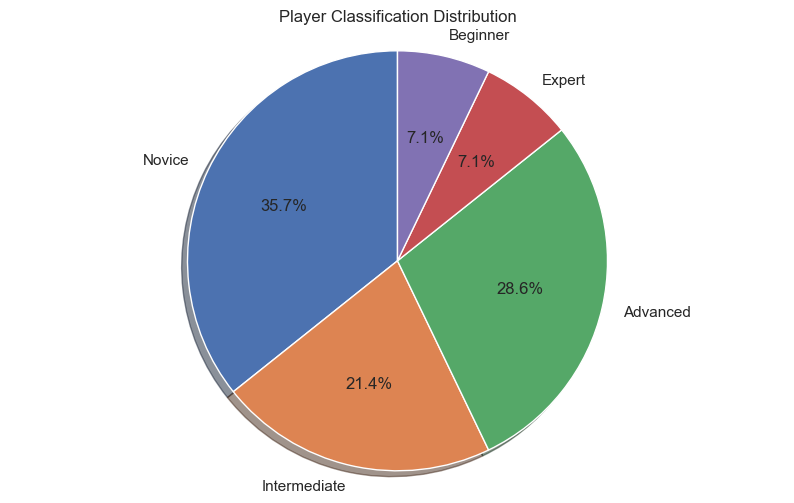

In [11]:
# Display players by classification
class_html = "<div style='background-color:#f0f0f0; padding:15px; border-radius:10px;'>"
class_html += "<h3>Player Classification Distribution</h3>"

for class_name, players in league_stats['players_by_classification'].items():
    class_html += f"<p><b>{class_name}:</b> {', '.join(players)}</p>"
    
class_html += "</div>"
display(HTML(class_html))

# Plot distribution
class_counts = {}
for class_name, players in league_stats['players_by_classification'].items():
    class_counts[class_name] = len(players)
    
plt.figure(figsize=(10, 6))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', 
       shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Player Classification Distribution')
plt.show()

## 5. Special Move Analysis

,Player,Bingo Count,Nonuple Word,Quadruple Word,Legendre Moves,Total Special Moves
2,JoueurX,1,0,0,0,1
0,JoueurA,0,0,0,0,0
1,JoueurB,0,0,0,0,0
3,JoueurY,0,0,0,0,0
4,JoueurC,0,0,0,0,0
5,JoueurD,0,0,0,0,0
6,JoueurE,0,0,0,0,0
7,JoueurF,0,0,0,0,0
8,JoueurG,0,0,0,0,0
9,JoueurH,0,0,0,0,0


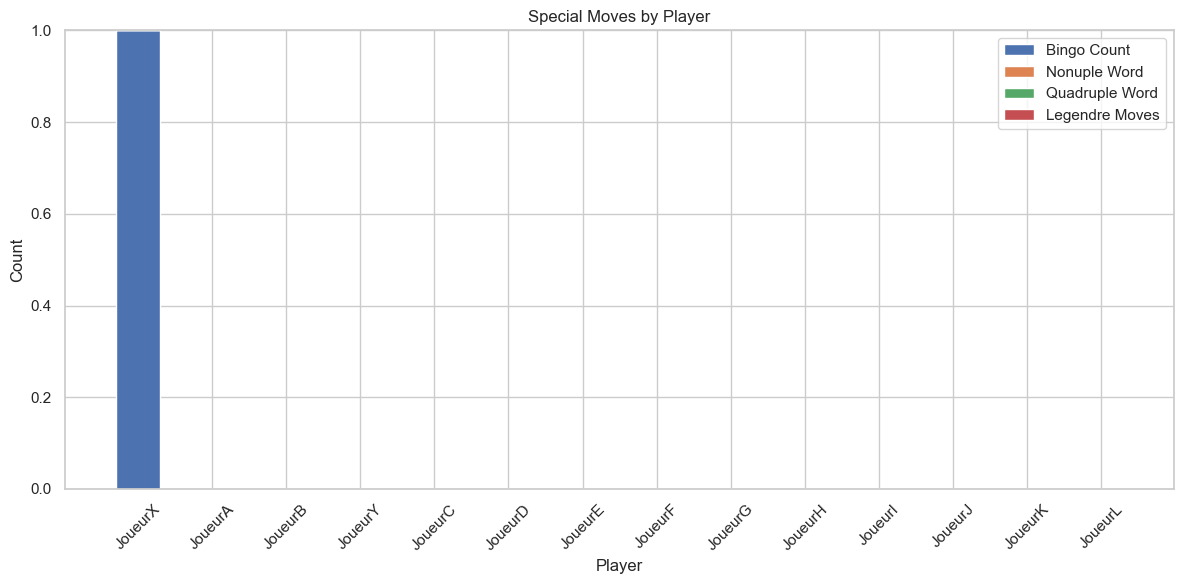

In [12]:
# Analysis of special moves (bingos and other special moves)
special_moves_data = []
for name, player in league.players.items():
    summary = player.get_summary()
    special_moves_data.append({
        'Player': name,
        'Bingo Count': summary['bingo_count'],
        'Nonuple Word': summary['special_moves'].get('nonuple_word', 0),
        'Quadruple Word': summary['special_moves'].get('quadruple_word', 0),
        'Legendre Moves': summary['special_moves'].get('legendre_moves', 0),
        'Total Special Moves': summary['bingo_count'] + 
                              summary['special_moves'].get('nonuple_word', 0) + 
                              summary['special_moves'].get('quadruple_word', 0) + 
                              summary['special_moves'].get('legendre_moves', 0)
    })

special_df = pd.DataFrame(special_moves_data).sort_values('Total Special Moves', ascending=False)
display(special_df)

# Visualize special moves distribution
plt.figure(figsize=(12, 6))

# Reshape data for stacked bar chart
special_types = ['Bingo Count', 'Nonuple Word', 'Quadruple Word', 'Legendre Moves']
x = np.arange(len(special_df['Player']))
width = 0.6

bottom = np.zeros(len(special_df['Player']))
for move_type in special_types:
    if move_type in special_df.columns:
        plt.bar(x, special_df[move_type], width, label=move_type, bottom=bottom)
        bottom += special_df[move_type]

plt.xlabel('Player')
plt.ylabel('Count')
plt.title('Special Moves by Player')
plt.xticks(x, special_df['Player'], rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

## 6. Conclusion

This dashboard provides a comprehensive view of player performance, match dynamics, and league-level statistics. The analysis demonstrates:

1. **Player Performance**: We can see how players are classified based on their scores and identify who consistently performs at higher levels.
2. **Match Dynamics**: The lead progression visualization shows how matches evolve and identifies pivotal moments in each game.
3. **Move Strategies**: The move value distribution analysis helps identify player tendencies (conservative vs. aggressive play).
4. **League Overview**: Classification distribution and league-wide metrics provide context for overall gameplay.

This system can be extended to track more statistics as the league progresses and can serve as a foundation for player improvement analysis over time.